# Support Vector Machine

## Background reading:
*Intro to Statistical Learning*: Chapter 9， Section 9.1, 9.2, 9.3, Support Vector Machine(Page 368-385)

*Ethical Algorithm*: Chapter 2, Algorithmic Fairness, Bias by Analogy, (Page 57-63)

## Dataset:
**2 Attributes:**

1. Words (Specific vocabularies that are feminine, masculine or neutral)
2. Category

Datasets comes from: https://link.springer.com/article/10.3758/BF03195592

This tutorial aims at using SVM to classify whether a word is gender-biased. To deal with vocabulary in computer, background of Natural Language Processing is discussed here for you to read if you are interested in.

## Essence of Data

### Before Algorithms:Basic Concepts

In this section, we will first introduce some basic concepts to help you understand what is support vector machine.

**Hyperplane**

Def: A subspace which has one less dimension than its space.
E.g.,  In a 2-dimensional space, a hyperplane is in one dimension (a line); In a 3-dimensional space, a hyperplane is in two dimensions (a plane)



In [1]:
r_files = ['.RData', '.RHistory', '.RProfile']
import pathlib
for rf in r_files:
    p = pathlib.Path.cwd() / rf
    try:
        p.rename(p.with_suffix('.ignore'))
    except FileNotFoundError:
        pass
import rpy2
from rpy2 import robjects
for rf in r_files:
    p = pathlib.Path.cwd() / rf
    p = p.with_suffix('.ignore')
    try:
        p.rename(p.with_suffix(''))
    except FileNotFoundError:
        pass

In [2]:
%load_ext rpy2.ipython

#This is used here to allow us to use both Python and R in Jupyter Notebook
# Before Running it, make sure that the IR kernel is installed to jupyter. You can also run these codes on r-studio for r languages

C:\Users\Yixuan\anaconda3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [3]:
# Before run the code, make sure that you have already installed ggplot2 and plotly packages. 
# Load the package for ggplot2, which is an excellent package to draw statistical graphs
%R require('ggplot2')
# Package plotly is used for creating 3-d plots
%R require('plotly')

Exception ignored from cffi callback <function _consolewrite_ex at 0x000002275F2D3940>:
Traceback (most recent call last):
  File "C:\Users\Yixuan\anaconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\Yixuan\anaconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 138, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 0: invalid continuation byte
Exception ignored from cffi callback <function _consolewrite_ex at 0x000002275F2D3940>:
Traceback (most recent call last):
  File "C:\Users\Yixuan\anaconda3\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\Yixuan\anaconda3\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 138, in _cchar_

1


In [3]:
# Generate a data frame to help understand the hyperplane in 2-d/3-d
import pandas as pd
df2 = pd.DataFrame({
    'x':[0,1,1,2,2,3,3,4,4,4,5,5,6],
    'y':[5.2,3.8,4.9,2.5,5.5,3,4,2.2,3.4,4.6,3,2.1,1.5]
})


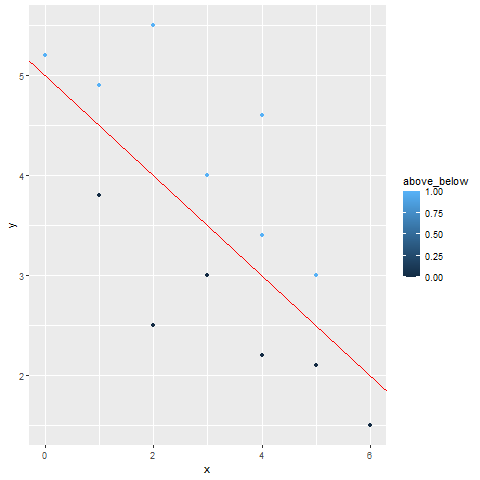

In [12]:
%%R -i df2
df2$above_below=ifelse(df2$y+0.5*df2$x-5>0,1,0)
df2
ggplot(df2, aes(x=x,y=y,col=above_below))+
       geom_point() + geom_abline(slope=-0.5,intercept=5,col='red')


In [35]:
df3 = pd.DataFrame({
    'x':[1,2,2,3,4,6,5,3,3],
    'y':[1,2,3,3,4,4,5,2,1],
    'z':[3,4,-7,-2,-4,-3,-12,-7,-9]
})

In [38]:
%%R -i df3
df3$above_below=ifelse(df3$x+df3$y+df3$z>0,1,0)
df3
input1=as.matrix(seq(1,6,0.1))
input2=as.matrix(seq(1,6,0.1))
input3=as.matrix(-input1-input2)

plot_ly(x=df3$x,y=df3$y,z=df3$z,type="scatter3d", mode="markers", color=df3$above_below)%>%
add_surface(x=input1,y=input2,z=input3)


The mathematical expression of the hyperplane in p-dimensions is:

<div align = 'center'><font size = '6'>$\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_px_p=0$</font></div>

From the graph above, the data points can be separated by a hyperplane in the space. When $\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_px_p>0$, the data points lie on one side of the hyperplane, while they lie on the other side when $\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_px_p<0$. It is reasonable to find out this natural classifier to do classification.

**Maximal Margin Classifier and Support Vector Classifier**

Margin: the perpendicular distance from the observation to the hyperplane

Maximal Margin Classifier: Among all the possible hyperplanes that can separate the data into categorizes, select the one that come up with the maximal margin.

**Support Vectors:**

In the space, there are some observations points that have equal distance from the maximal margin hyperplane. For example, in this graph there are some support vectors lie on the dashed line, with their distances shown as arrows. These observations are called support vectors since they “support” the hyperplane (when the support vectors move a little bit, the hyperplane will move as well, while the movement of other observations does not affect the hyperplane)

![Figure 9.3 From Textbook Page 372](./fig/SVM&WE/fig1.png)

**Support Vector Classifiers**

Sometimes the datasets cannot be separated perfectly by the hyperplane. In such case, support vector classifier is considered, which is a more generalized case of maximal margin classifier. We allow some of the observations to be on the wrong side of the margin/hyperplane. Details of the mathematical expression: page 375.

![Figure 9.6 From Textbook Page 376](./fig/SVM&WE/fig2.png)

Left: observation 1 and 8 are on the wrong side of the margin
Right: observation 11 and 12 are on the wrong side of the hyperplane

**Support Vector Machine:**

Sometimes the datasets cannot be separated by using a linear hyperplane, even we allow some of the observations to be on the wrong side. For example, it is impossible to build up a classifier by using a linear boundary for the data below. Thus, we need some techniques to increase the complexity and the non-linearity of the model to make good predictions. The technique is called kernel.

![Figure 9.8 From Textbook Page 379](./fig/SVM&WE/fig3.png)

What is **kernel**?

By using some kernel function to transform the data into, for example, higher dimensions, to ensure that the inner product is the same as the previous one, then to make it separable in the new case.

Examples of kernel functions:
Polynomial, Gaussian, RBF, Sigmoid, Radial, etc.

**Which kernel to choose?**

This is a very tricky problem and could be one of the drawbacks of SVM, since there are no good rules to follow. Sometimes you should try a lot of different kernel functions to reach out one best model. For example, for the data graph above, both kernel function of polynomial of degree 3 (left) and radial (right) works well.

![Figure 9.9 From Textbook Page 383](./fig/SVM&WE/fig4.png)

### Before Application: Background of Natural Language Processing

In this section, we will cover topics related to natural language processing(NLP)

**Word Processing**

	When dealing with the language (known as Natural Language Processing), unfortunately the computer cannot handle the characters/vocabularies and does not understand the meaning of them (Remember when the computer processes the characters, it will transform them into digital data by some encoding form such as Unicode or UTF-8). Consequently, it is necessary to translate the language into digital data before the computer can analyze. The most common techniques include one-hot encoding and word embedding.

Here are two useful articles related to the background:

**Power of NLP**

https://hbr.org/2022/04/the-power-of-natural-language-processing

**NLP and Google Translate**

https://www.kdnuggets.com/2017/09/machine-learning-translation-google-translate-algorithm.html

**What is word embedding?**

	When doing the natural language processing, associate a vector with a word where the vectors are learned from data. i.e., generate vectors that encodes the meaning of the words so that the words that are closed to each other in the space that we are interested are similar in their meanings. For example, in a space, we have a “gender” vectors and “plural” vectors. By adding a “female” vector to the vector “king/actor”, we obtain the vector “queen/actress”; by adding the “plural” vector we will obtain “kings/actors”

![Words on different axises](./fig/SVM&WE/fig5.jpg)


In [44]:
df_we = pd.DataFrame({
    'gender_axis':[1,1,3,3],
    'plural_axis':[1,3,1,3]
})

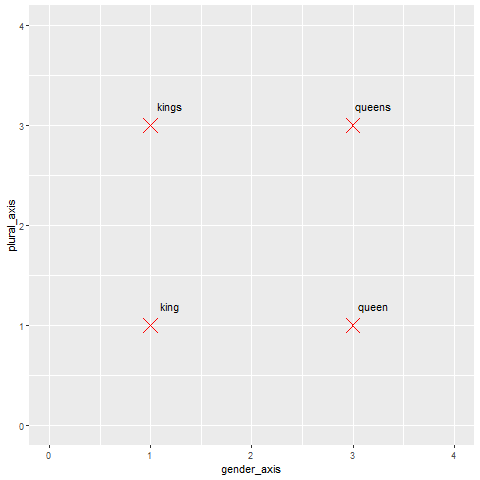

In [50]:
%%R -i df_we

ggplot(data=df_we) +
    geom_point(mapping = aes(x = gender_axis, y = plural_axis), shape = 4, size = 6, col = "red") +
    annotate("text", x = 1.2, y = 1.2, label = "king") +
    annotate("text", x = 3.2, y = 1.2, label = "queen") +
    annotate("text", x = 1.2, y = 3.2, label = "kings") +
    annotate("text", x = 3.2, y = 3.2, label = "queens") +
    scale_x_continuous(limits=c(0,4)) +
    scale_y_continuous(limits=c(0,4))

https://www.ibm.com/blogs/research/2018/11/word-movers-embedding/

![Words vectors in the space](./fig/SVM&WE/fig6.png)

**Why word embeddings?**

	When doing natural language processing, the computer itself does not understand the real meaning behind the vocabularies. It only processing the digital data. Thus, when dealing with languages (or any other non-digital data), we should figure out a way to transform the data into digital data (encoding) so that the computer can understand and process with it, then we get the result by decoding it.
	There are several different methods to transform the language. Another popular one is the one-hot encoding, which is also a common way. It consists of associating a unique integer index with every word and then turning the index into a binary vector of size of the vocabulary, while the other to be zero. i.e., the vector will be zeros except for that index to be 1. 
    
![Examples of one-hot encoding and Word Embeddings](./fig/SVM&WE/fig7.png)

	However, you may think about the downsides of word embeddings. Imagine if there are some neutral vocabularies that do not imply any gender, but it is predicted to be a gender-specific word (which is a bias! Because the word itself does not have any gender-bias) For example, one model may encodes “muscles”, “Programmer” and “game” with vectors that have more “male” values of projection on the gender axis. Sometimes the insufficient of the data will aggravate the bias further.




### Example of Codes

In this section we will try to use word embeddings and SVM as tools to process with words

In [1]:
# First, Import all packages
import numpy as np
import pandas as pd
import gensim
from gensim.models import KeyedVectors
from gensim import models
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.svm import SVC

*To make a word-embedding model, we will use gensim package which is sophisticated. To simplify understanding, we will use a pre-trained model (Word2Vec) by Google that contains millions of words that are trained based on its corpus. 

*The pre-trained model is described here: https://code.google.com/archive/p/word2vec/. The model contains millions of words with their vectors (thousands dimensions) with enormous size. 

**The pre-trained model can be downloaded from here:https://code.google.com/archive/p/word2vec/
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g
**


In [2]:
# Load the pre-trained model (It takes some time to run it cause the size is millions)
# ! Download from website and store it
word2vec_path = 'GoogleNews-vectors-negative300.bin.gz'
model = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
# Notice that model is a "Word2Vec" pre-trained model object here
model

In [3]:
dataset = pd.read_csv('WordEmbeddings.csv')
dataset

,Vocabulary,Category
0,Wife,Feminine
1,Princess,Feminine
2,Bridesmaid,Feminine
3,Pregnant,Feminine
4,Bride,Feminine
...,...,...
595,Testosterone,Masculine
596,Husband,Masculine
597,Father,Masculine
598,Brother,Masculine


In [4]:
# Access the vectors of the model
word_dict = dict({})
for index, key in enumerate(model.key_to_index):
    word_dict[key] = model.get_vector(key)

# Print
len(word_dict)

3000000

In [5]:
# The size is too large. Filter those that are useful
new_dict = dict((k, word_dict[k]) for k in dataset['Vocabulary'] if k in word_dict)
len(new_dict)

595

In [6]:
# Settle Database

x_all = list()
for x in new_dict.values():
    x_all.append(x)

print(len(x_all))
    


595


In [7]:
y_all = list()
for y in dataset['Vocabulary']:
    if y in new_dict.keys():
        y_all.append(y)

len(y_all)

595

In [8]:
# Separate into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size = 0.2, random_state = 43960)
len(x_test)

119

In [9]:
# Start SVM classifier
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC()

In [10]:
# Check the Accuracy
svm_classifier.score(x_train, y_train)


1.0

In [11]:
# Check the Accuracy
svm_classifier.score(x_test, y_test)


0.0

In [ ]:
#an simple application of the Word2Vec package
#resource: https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Yzu2pHbMJPZ

In [4]:
# imports packeges
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
data_file="reviews_data.txt.gz"

with gzip.open ('reviews_data.txt.gz', 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

In [6]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

In [7]:
documents = list (read_input (data_file))
logging.info ("Done reading data file")   

2022-10-04 22:57:18,469 : INFO : reading file reviews_data.txt.gz...this may take a while
2022-10-04 22:57:18,470 : INFO : read 0 reviews
2022-10-04 22:57:20,925 : INFO : read 10000 reviews
2022-10-04 22:57:23,592 : INFO : read 20000 reviews
2022-10-04 22:57:26,784 : INFO : read 30000 reviews
2022-10-04 22:57:28,949 : INFO : read 40000 reviews
2022-10-04 22:57:31,352 : INFO : read 50000 reviews
2022-10-04 22:57:33,653 : INFO : read 60000 reviews
2022-10-04 22:57:35,460 : INFO : read 70000 reviews
2022-10-04 22:57:37,403 : INFO : read 80000 reviews
2022-10-04 22:57:39,231 : INFO : read 90000 reviews
2022-10-04 22:57:40,935 : INFO : read 100000 reviews
2022-10-04 22:57:42,703 : INFO : read 110000 reviews
2022-10-04 22:57:44,555 : INFO : read 120000 reviews
2022-10-04 22:57:46,284 : INFO : read 130000 reviews
2022-10-04 22:57:48,577 : INFO : read 140000 reviews
2022-10-04 22:57:50,933 : INFO : read 150000 reviews
2022-10-04 22:57:53,548 : INFO : read 160000 reviews
2022-10-04 22:57:56,008

In [8]:
model = gensim.models.Word2Vec (documents, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10) 

2022-10-04 22:58:17,340 : INFO : collecting all words and their counts
2022-10-04 22:58:17,341 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-10-04 22:58:17,652 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2022-10-04 22:58:17,957 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2022-10-04 22:58:18,384 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2022-10-04 22:58:18,827 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2022-10-04 22:58:19,305 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2022-10-04 22:58:19,771 : INFO : PROGRESS: at sentence #60000, processed 11013727 words, keeping 76787 word types
2022-10-04 22:58:20,079 : INFO : PROGRESS: at sentence #70000, processed 12637529 words, keeping 83200 word types
2022-10-04 22:58:20,389 : INFO : PROG

2022-10-04 22:58:53,554 : INFO : EPOCH 1 - PROGRESS: at 25.24% examples, 1430451 words/s, in_qsize 18, out_qsize 1
2022-10-04 22:58:54,555 : INFO : EPOCH 1 - PROGRESS: at 31.95% examples, 1487188 words/s, in_qsize 20, out_qsize 0
2022-10-04 22:58:55,563 : INFO : EPOCH 1 - PROGRESS: at 38.26% examples, 1527614 words/s, in_qsize 18, out_qsize 1
2022-10-04 22:58:56,574 : INFO : EPOCH 1 - PROGRESS: at 44.83% examples, 1556132 words/s, in_qsize 19, out_qsize 0
2022-10-04 22:58:57,576 : INFO : EPOCH 1 - PROGRESS: at 51.06% examples, 1579336 words/s, in_qsize 18, out_qsize 1
2022-10-04 22:58:58,580 : INFO : EPOCH 1 - PROGRESS: at 57.27% examples, 1600936 words/s, in_qsize 18, out_qsize 1
2022-10-04 22:58:59,583 : INFO : EPOCH 1 - PROGRESS: at 63.50% examples, 1616732 words/s, in_qsize 17, out_qsize 2
2022-10-04 22:59:00,591 : INFO : EPOCH 1 - PROGRESS: at 69.56% examples, 1628847 words/s, in_qsize 18, out_qsize 1
2022-10-04 22:59:01,592 : INFO : EPOCH 1 - PROGRESS: at 75.44% examples, 1637596

2022-10-04 23:00:04,578 : INFO : EPOCH 4 - PROGRESS: at 54.15% examples, 1088245 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:00:05,579 : INFO : EPOCH 4 - PROGRESS: at 60.48% examples, 1132362 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:00:06,704 : INFO : EPOCH 4 - PROGRESS: at 66.49% examples, 1157821 words/s, in_qsize 20, out_qsize 1
2022-10-04 23:00:07,793 : INFO : EPOCH 4 - PROGRESS: at 66.99% examples, 1098627 words/s, in_qsize 20, out_qsize 0
2022-10-04 23:00:08,884 : INFO : EPOCH 4 - PROGRESS: at 69.19% examples, 1070587 words/s, in_qsize 19, out_qsize 1
2022-10-04 23:00:09,892 : INFO : EPOCH 4 - PROGRESS: at 70.50% examples, 1038762 words/s, in_qsize 20, out_qsize 2
2022-10-04 23:00:10,895 : INFO : EPOCH 4 - PROGRESS: at 76.46% examples, 1073551 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:00:11,931 : INFO : EPOCH 4 - PROGRESS: at 79.80% examples, 1069958 words/s, in_qsize 18, out_qsize 1
2022-10-04 23:00:12,938 : INFO : EPOCH 4 - PROGRESS: at 81.05% examples, 1041366

2022-10-04 23:01:04,659 : INFO : EPOCH 1: training on 41519359 raw words (30349872 effective words) took 26.1s, 1162367 effective words/s
2022-10-04 23:01:05,670 : INFO : EPOCH 2 - PROGRESS: at 5.73% examples, 1757816 words/s, in_qsize 18, out_qsize 1
2022-10-04 23:01:06,679 : INFO : EPOCH 2 - PROGRESS: at 11.11% examples, 1784449 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:01:07,686 : INFO : EPOCH 2 - PROGRESS: at 16.24% examples, 1785872 words/s, in_qsize 17, out_qsize 2
2022-10-04 23:01:08,696 : INFO : EPOCH 2 - PROGRESS: at 20.97% examples, 1787759 words/s, in_qsize 18, out_qsize 1
2022-10-04 23:01:09,703 : INFO : EPOCH 2 - PROGRESS: at 26.61% examples, 1790034 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:01:10,705 : INFO : EPOCH 2 - PROGRESS: at 33.05% examples, 1787821 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:01:11,707 : INFO : EPOCH 2 - PROGRESS: at 39.06% examples, 1778343 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:01:12,710 : INFO : EPOCH 2 - PROGRESS: at 45

2022-10-04 23:02:14,871 : INFO : EPOCH 5 - PROGRESS: at 13.63% examples, 851549 words/s, in_qsize 20, out_qsize 1
2022-10-04 23:02:15,957 : INFO : EPOCH 5 - PROGRESS: at 14.05% examples, 729935 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:02:17,074 : INFO : EPOCH 5 - PROGRESS: at 16.33% examples, 726032 words/s, in_qsize 20, out_qsize 1
2022-10-04 23:02:18,083 : INFO : EPOCH 5 - PROGRESS: at 18.03% examples, 713399 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:02:19,092 : INFO : EPOCH 5 - PROGRESS: at 23.10% examples, 831649 words/s, in_qsize 18, out_qsize 1
2022-10-04 23:02:20,188 : INFO : EPOCH 5 - PROGRESS: at 23.73% examples, 768688 words/s, in_qsize 20, out_qsize 1
2022-10-04 23:02:21,257 : INFO : EPOCH 5 - PROGRESS: at 26.45% examples, 769303 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:02:22,258 : INFO : EPOCH 5 - PROGRESS: at 27.27% examples, 726110 words/s, in_qsize 18, out_qsize 1
2022-10-04 23:02:23,259 : INFO : EPOCH 5 - PROGRESS: at 33.52% examples, 800202 words/s,

2022-10-04 23:03:26,879 : INFO : EPOCH 7 - PROGRESS: at 96.12% examples, 1146104 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:03:27,880 : INFO : EPOCH 7 - PROGRESS: at 97.81% examples, 1121251 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:03:28,204 : INFO : EPOCH 7: training on 41519359 raw words (30348033 effective words) took 26.8s, 1130977 effective words/s
2022-10-04 23:03:29,219 : INFO : EPOCH 8 - PROGRESS: at 5.77% examples, 1765497 words/s, in_qsize 18, out_qsize 1
2022-10-04 23:03:30,227 : INFO : EPOCH 8 - PROGRESS: at 11.11% examples, 1781107 words/s, in_qsize 18, out_qsize 1
2022-10-04 23:03:31,229 : INFO : EPOCH 8 - PROGRESS: at 16.27% examples, 1791378 words/s, in_qsize 18, out_qsize 1
2022-10-04 23:03:32,230 : INFO : EPOCH 8 - PROGRESS: at 21.02% examples, 1797331 words/s, in_qsize 19, out_qsize 0
2022-10-04 23:03:33,242 : INFO : EPOCH 8 - PROGRESS: at 26.68% examples, 1796064 words/s, in_qsize 18, out_qsize 1
2022-10-04 23:03:34,243 : INFO : EPOCH 8 - PROGRESS: at 33

(303483481, 415193590)

In [9]:
w1 = "dirty"
model.wv.most_similar (positive=w1,topn=6)

[('filthy', 0.895108163356781),
 ('unclean', 0.8111907243728638),
 ('stained', 0.8079451322555542),
 ('grubby', 0.7981095314025879),
 ('dusty', 0.7923869490623474),
 ('smelly', 0.78857421875)]

In [10]:
w2 = ["shocked"]
model.wv.most_similar (positive=w2,topn=6)

[('horrified', 0.8209891319274902),
 ('amazed', 0.8154876828193665),
 ('appalled', 0.7777613401412964),
 ('astonished', 0.76986163854599),
 ('dismayed', 0.7686170935630798),
 ('stunned', 0.7485442757606506)]

In [11]:
model.wv.similarity(w1="dirty",w2="dusty")

0.792387

In [12]:
model.wv.similarity(w1="dirty",w2="clean")

0.2624902

In [13]:
model.wv.doesnt_match(["bed","pillow","duvet","shower"])

'shower'

# AI in the fabrics of society

Notice that the accuracy of the training data is perfect, but it does not work on testing data. That is to say, when we use machine to classify whether a word is gender-based or not, it will make its own decision that is **sometimes not accurate** for future predictions (since **machine itself does not understand the meaning of vocabulary**)

Although the accuracy sometimes is excellent for the machine learning algorithm, the problem is that sometimes it will cause some bias. For some vacabularies that is not a gender-based meaning, the algorithm will consider it to be a gender-related because of, for example, the occurance times of that words together with some other words(such as smoking may be considered to be a masculine word because it appears together with male more often than female)

Here is an article regarding this gender-biased problem: 

Man is to Computer Programmer as Woman is to Homemaker? | by Sheldon Sebastian | Towards Data Science
https://towardsdatascience.com/man-is-to-computer-programmer-as-woman-is-to-homemaker-e57b07cbde96

### Hate Speech Content Moderation on Social Media Platforms

Social Media companies have become a forefront for algorithms that can detect hate speech on their platforms. These companies are receiving pressure from their users, and governments to moderate their content to ensure safety, while still promoting autonomy.  These companies have developed various forms of NLPs to moderate hate speech.

These algorithms have the ability to detect hate speech, but they are not perfect. The main problem these algorithms face are taking words out of context. The algorithms are sensitive to specific words, and it is difficult to indicate whether a specific word or phrase is being used as hate speech.  Another problem is that social norms change over time. Historical text, from recent or long ago, can contain words classified as hate speech, but were used commonly in texts written in that time period. 

Users who want to post hate speech have multiple ways to evade these algorithms. Users can input punctuation, use slang, or display the text in a picture instead of a comment.  These algorithms are best used on apps like Twitter and Reddit, because they consist of primarily words, and few images and videos.  Alternatively, apps like TikTok face a bigger challenge because their posts contain primarily videos, and include the opportunity for voiceovers and text in the video frames.

Content moderation is a controversial issue because what is and isn’t hate speech is still subjective to different people.  These companies are making their own rules on how much to moderate, and the debate becomes more and more difficult as more sophisticated algorithms begin to be used.

An example of how you would build an NLP to classify tweets as hate speech or not is linked here
https://towardsdatascience.com/detecting-hate-tweets-twitter-sentiment-analysis-780d8a82d4f6

A comprehensive review of TikToks hate speech content moderation, with an emphasis on algorithm evasion tactics on pages 42-44
https://www.isdglobal.org/wp-content/uploads/2021/08/HateScape_v5.pdf




In [6]:
#A Word Embeding Model: Glove
#Reference: https://nlp.stanford.edu/projects/glove/
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

embeddings_dict = {}
#Download the GLOVE model from:
#https://nlp.stanford.edu/projects/glove/
with open("glove.6B.50d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],"float32")
        embeddings_dict[word] = vector



In [48]:
#nearest neighbors of frog
def closest(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))
words = []
for a in closest(embeddings_dict["frog"])[:5]:
    words.append(a)
words

['frog', 'snake', 'ape', 'toad', 'monkey']

G:\anocanda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
G:\anocanda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


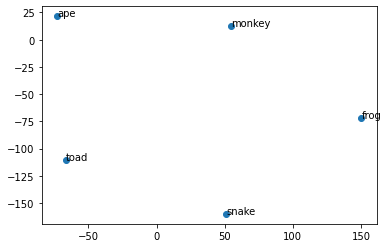

In [51]:
tsne = TSNE(n_components=2, random_state=0)
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:5])
pyplot.scatter(Y[:, 0], Y[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(Y[i, 0], Y[i, 1]))
pyplot.show()


In [46]:
#Comparisons man -> woman
comparsions=['man','woman','tennes','drive','movie','dress']
vectors = [embeddings_dict[word] for word in comparsions]
Y = tsne.fit_transform(vectors[:7])

G:\anocanda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
G:\anocanda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


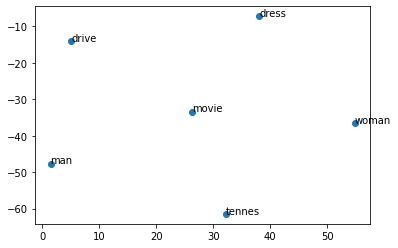

In [47]:
pyplot.scatter(Y[:, 0], Y[:, 1])
for i, word in enumerate(comparsions):
    pyplot.annotate(word, xy=(Y[i, 0], Y[i, 1]))
pyplot.show()